In [1]:
from matplotlib.colors import ListedColormap
from sklearn import datasets, metrics, neighbors 
from sklearn import model_selection

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
classification_problem = datasets.make_classification(n_samples=200, n_features =2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=5)

In [4]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

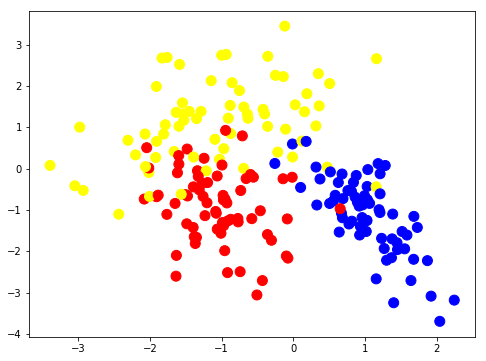

In [5]:
pylab.figure(figsize=(8,6))
pylab.scatter(list(map(lambda x: x[0], classification_problem[0])),list(map(lambda x: x[1], classification_problem[0])), 
              c=classification_problem[1], cmap=colors, s=100)

In [6]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

In [7]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.81666666666666665

In [9]:
predictions

array([1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 2, 1, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 1,
       1, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 0, 2])

In [10]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [11]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

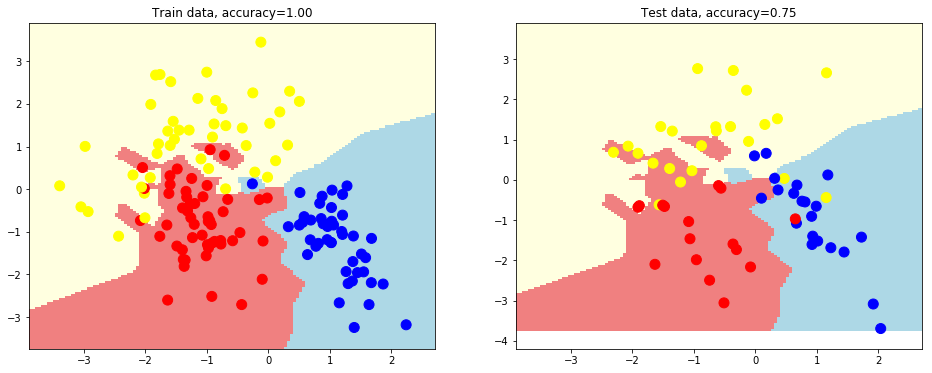

In [12]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)
train_acc = [metrics.accuracy_score(train_labels, estimator.predict(train_data))]
test_acc = [metrics.accuracy_score(test_labels, estimator.predict(test_data))]

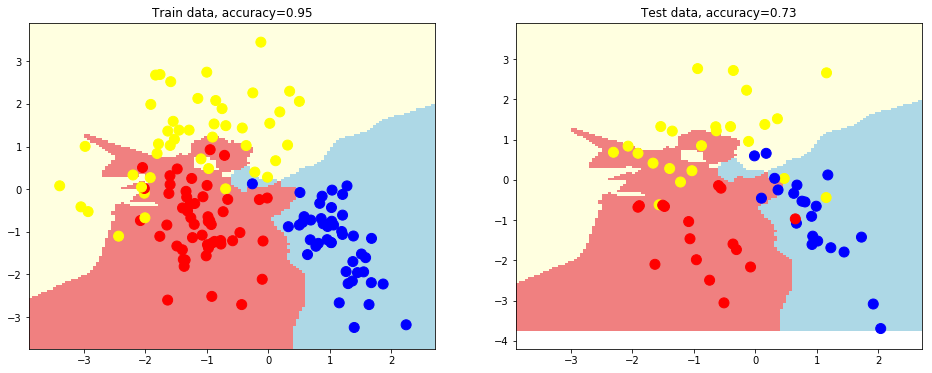

In [13]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)
train_acc = [metrics.accuracy_score(train_labels, estimator.predict(train_data))]
test_acc = [metrics.accuracy_score(test_labels, estimator.predict(test_data))]

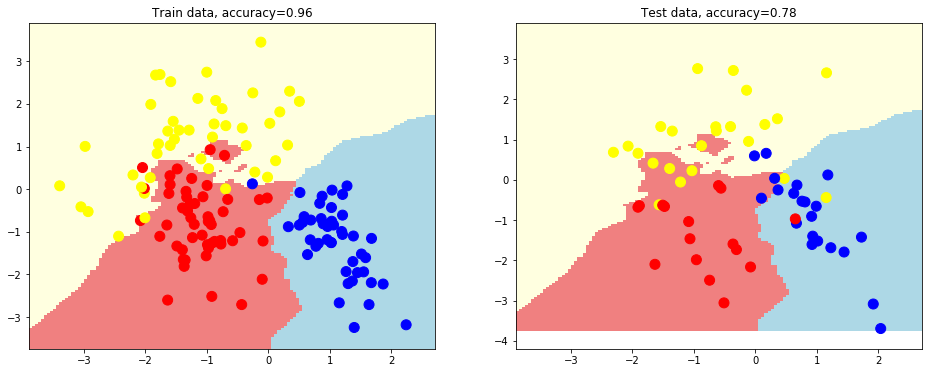

In [14]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)
train_acc = [metrics.accuracy_score(train_labels, estimator.predict(train_data))]
test_acc = [metrics.accuracy_score(test_labels, estimator.predict(test_data))]

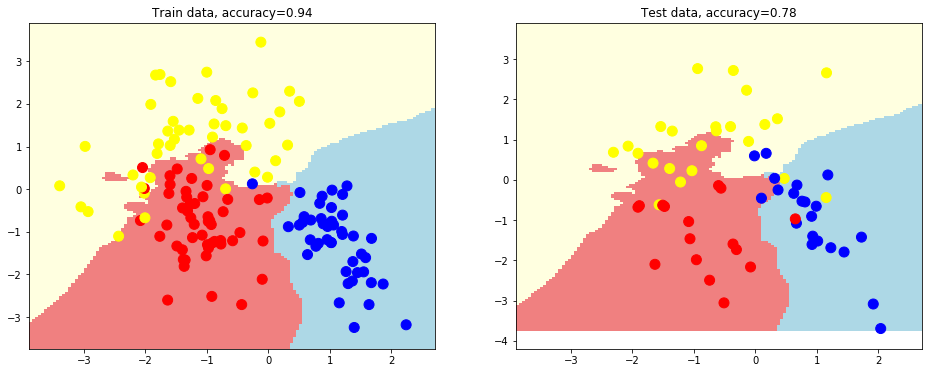

In [15]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=4)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)
train_acc = [metrics.accuracy_score(train_labels, estimator.predict(train_data))]
test_acc = [metrics.accuracy_score(test_labels, estimator.predict(test_data))]

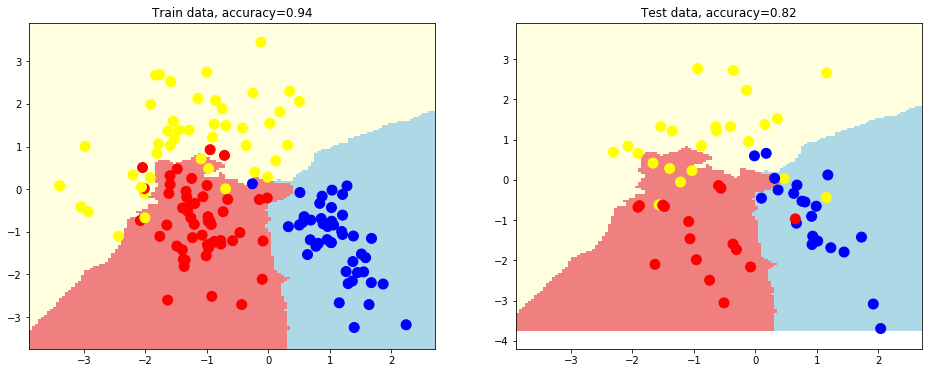

In [16]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)
train_acc = [metrics.accuracy_score(train_labels, estimator.predict(train_data))]
test_acc = [metrics.accuracy_score(test_labels, estimator.predict(test_data))]

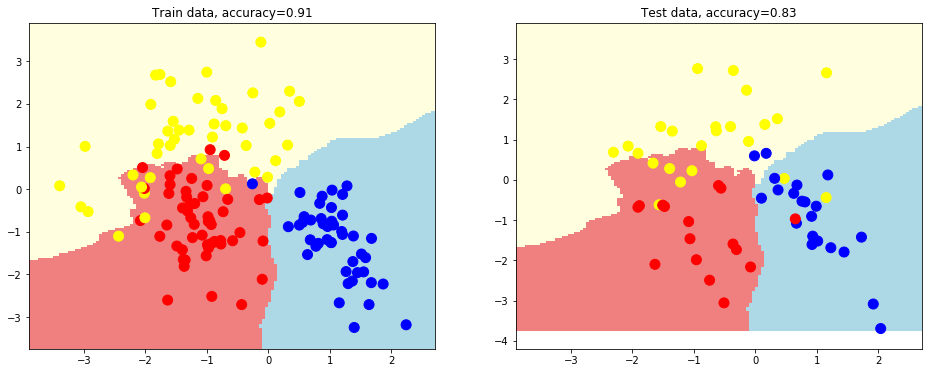

In [17]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)
train_acc = [metrics.accuracy_score(train_labels, estimator.predict(train_data))]
test_acc = [metrics.accuracy_score(test_labels, estimator.predict(test_data))]

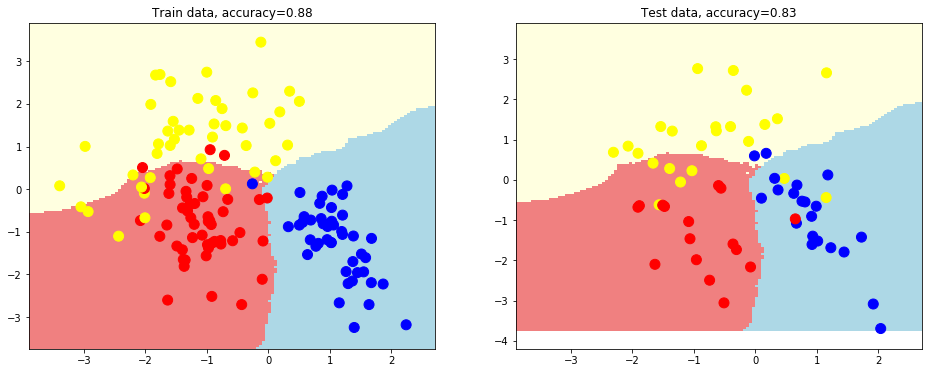

In [18]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=20)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)
train_acc = [metrics.accuracy_score(train_labels, estimator.predict(train_data))]
test_acc = [metrics.accuracy_score(test_labels, estimator.predict(test_data))]

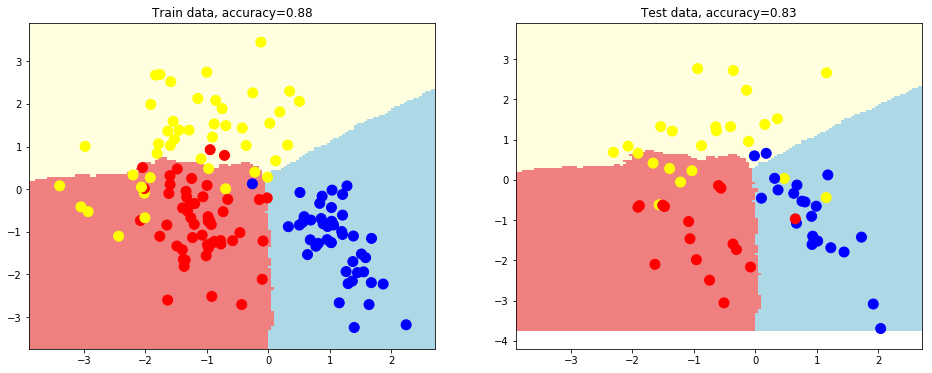

In [19]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=30)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)
train_acc = [metrics.accuracy_score(train_labels, estimator.predict(train_data))]
test_acc = [metrics.accuracy_score(test_labels, estimator.predict(test_data))]

In [21]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)

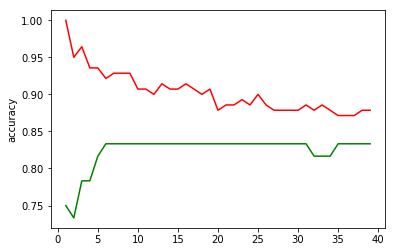

In [22]:
k_values = np.arange(1, 40)
test_accuracies = [
    metrics.accuracy_score(
        neighbors.KNeighborsClassifier(n_neighbors=k).fit(train_data, train_labels).predict(test_data),
        test_labels
    )
    for k in k_values
]
train_accuracies = [
    metrics.accuracy_score(
        neighbors.KNeighborsClassifier(n_neighbors=k).fit(train_data, train_labels).predict(train_data),
        train_labels
    )
    for k in k_values
]
plt.plot(k_values, train_accuracies, 'r')
plt.ylabel("accuracy")
plt.plot(k_values, test_accuracies, 'g')

plt.show()

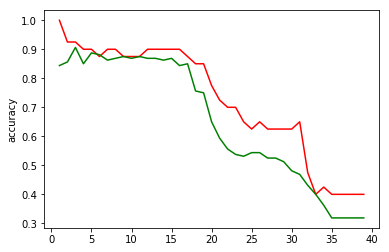

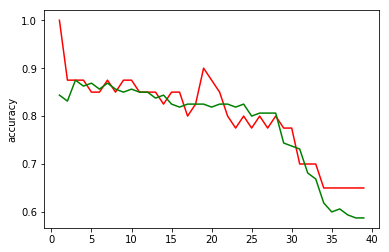

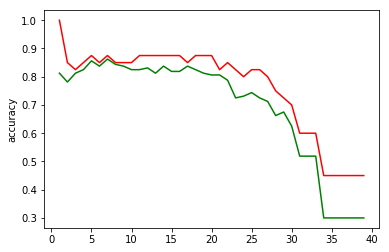

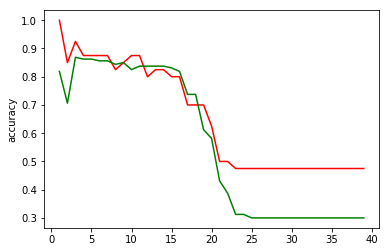

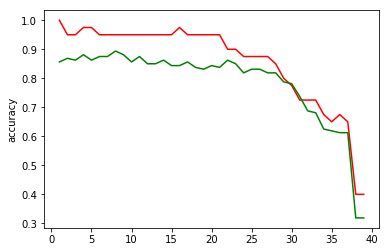

In [40]:
k_values = np.arange(1, 40)
for test_data2, train_data2 in kf.split(classification_problem[0]):
    test_accuracies = [
        metrics.accuracy_score(
            neighbors.KNeighborsClassifier(n_neighbors=k).fit(classification_problem[0][train_data2],
                                                              classification_problem[1][train_data2]
                                                             ).predict(classification_problem[0][test_data2]),
            classification_problem[1][test_data2]
        )
        for k in k_values
    ]
    train_accuracies = [
        metrics.accuracy_score(
            neighbors.KNeighborsClassifier(n_neighbors=k).fit(classification_problem[0][train_data2],
                                                              classification_problem[1][train_data2]
                                                             ).predict(classification_problem[0][train_data2]),
            classification_problem[1][train_data2]
        )
        for k in k_values
    ]
    plt.plot(k_values, train_accuracies, 'r')
    plt.ylabel("accuracy")
    plt.plot(k_values, test_accuracies, 'g')
    plt.show()